# OSM Processing

## Import Packages

In [18]:
import os
import geopandas as gpd
import pandas as pd
import pickle
from pathlib import Path

# Set Directory:

In [19]:
user_directory = os.fspath(Path.home()) #get home directory and convert to path string
file_directory = r"/Documents/BikewaySimData" #directory of bikewaysim outputs
os.chdir(user_directory+file_directory)

## Import custom modules

In [20]:
from osm_dwnld import * #contains functions for downloaded data from OSMnx and Overpass API

## Choose Study Area

<AxesSubplot:>

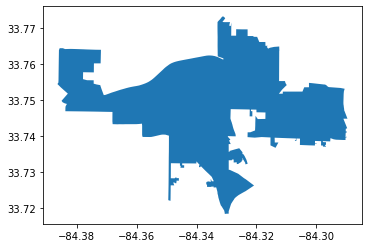

In [21]:
#give filepath of a shapefile/geojson/geopackage and study area name

#studyareafp = r'base_shapefiles/bikewaysim_study_area/bikewaysim_study_area.shp'
#studyareaname = 'bikewaysim'

#studyareafp = r'base_shapefiles/studyareas/ITS4US_StudyBoundary.shp'
#studyareaname = 'its4us'

#studyareafp = r'base_shapefiles/coa/Atlanta_City_Limits.shp'
#studyareaname = 'coa'

#studyareafp = r'base_shapefiles/arc/arc_bounds.shp'
#studyareaname = 'arc'

#studyareafp = r'processed_shapefiles\bike_transit\all_stops_buffer.geojson'
#studyareaname = 'marta'

studyareafp = r'base_shapefiles/studyareas/atl_district5.gpkg'
studyareaname = 'atl_district5'

#read in study area polygon and convert to WGS 84
gdf = gpd.read_file(studyareafp).to_crs(epsg=4326)
gdf.plot()

## Download OSM geometry using OSMnx and attribute data using Overpass API
### More info about OSMnx: https://geoffboeing.com/2016/11/osmnx-python-street-networks/
### OSMnx documentation: https://osmnx.readthedocs.io/en/stable/index.html

C:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


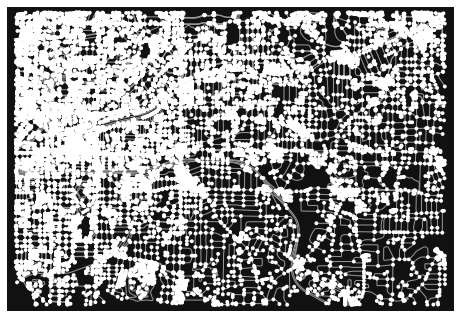

The bounding box is -84.3864697373159, 33.718390720097, -84.2896148045169, 33.773284538064


C:\Users\tpassmore6\Documents\GitHub\BikewaySimDev\osm_dwnld.py:101: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'tags.', '')


In [22]:
osm_nodes, osm_links = download_osm(gdf)

In [23]:
osm_nodes.head()

,osmid,y,x,street_count,ref,highway,geometry
0,68143373,33.773266,-84.300514,2,NaN,NaN,POINT (-84.30051 33.77327)
1,68144807,33.769157,-84.304645,3,NaN,NaN,POINT (-84.30464 33.76916)
2,68144843,33.760759,-84.294324,1,NaN,NaN,POINT (-84.29432 33.76076)
3,68144844,33.759691,-84.294142,3,NaN,NaN,POINT (-84.29414 33.75969)
4,68145626,33.730523,-84.323142,3,62,motorway_junction,POINT (-84.32314 33.73052)


In [24]:
osm_links.head()

,osmid,A,B,key,geometry,type,id,nodes,access,highway,...,traffic_calming,informal,change:lanes,change:forward,cutting,step_count,placement:end,placement:start,lat,lon
0,9190058,68143373,5445046534,0,"LINESTRING (-84.30052 33.77286, -84.30051 33.7...",way,9190058,"[68373332, 68241516, 5416101227, 68241500, 683...",NaN,residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9190058,68282055,5424205677,0,"LINESTRING (-84.30052 33.77262, -84.30052 33.7...",way,9190058,"[68373332, 68241516, 5416101227, 68241500, 683...",NaN,residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9190058,68282055,68340806,0,"LINESTRING (-84.30052 33.77226, -84.30052 33.7...",way,9190058,"[68373332, 68241516, 5416101227, 68241500, 683...",NaN,residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9190058,68340806,5416101227,0,"LINESTRING (-84.30053 33.77167, -84.30052 33.7...",way,9190058,"[68373332, 68241516, 5416101227, 68241500, 683...",NaN,residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9190058,68373332,5416101227,0,"LINESTRING (-84.30053 33.77167, -84.30053 33.7...",way,9190058,"[68373332, 68241516, 5416101227, 68241500, 683...",NaN,residential,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a pickle file to store all the attributes

In [25]:
with open(f'processed_shapefiles/osm/{studyareaname}_attr.pkl', 'wb') as fh:
        pickle.dump(osm_links,fh)

Remove columns with unsupported datatypes

In [26]:
for col in osm_links.columns.tolist():
    if list in [type(x) for x in osm_links.loc[:,col]]:
        osm_links.drop(columns=col,inplace=True)
        print(f"{col} column removed...")        

nodes column removed...


#### Preprocess
- Remove controlled access roads
- Remove sidewalks and crosswalks unless they explicitly allow bikes

##used this for lime
#create filtered links
osm_links_filt = osm_links

#remove restricted access roads + sidewalks
restr_access = osm_links_filt['highway'].isin(['motorway','motorway_link'])
osm_links_filt = osm_links_filt[-restr_access]
        
#remove sidewalks unless bikes explicitly allowed
remove_sidewalks = (osm_links_filt['footway'].isin(['sidewalk','crossing'])) & (osm_links_filt['bicycle'] != 'yes')
osm_links_filt = osm_links_filt[-remove_sidewalks]

osm_links_filt = gpd.read_file('osm/for_lime/osm_links_lime_032222.geojson')

#remove nodes that aren't in filtered links
nodes = osm_links_filt['A'].append(osm_links_filt['B']).unique()
osm_nodes_filt = osm_nodes[osm_nodes['osmid'].isin(nodes)]

#export
cols = ['A','B','osmid','highway','geometry']
osm_nodes_filt.to_file('osm/for_lime/osm_nodes_lime.geojson',driver='GeoJSON')
osm_links_filt[cols].to_file('osm/for_lime/osm_links_lime.geojson',driver='GeoJSON')
osm_nodes_filt.to_file('osm/for_lime/osm_nodes_lime.shp')
osm_links_filt[cols].to_file('osm/for_lime/osm_links_lime.shp')

osm_links_filt = gpd.read_file('osm/for_lime/osm_links_lime_032222.geojson')

#remove nodes that aren't in filtered links
nodes = osm_links_filt['A'].append(osm_links_filt['B']).unique()
osm_nodes_filt = osm_nodes[osm_nodes['osmid'].isin(nodes)]

osm_nodes_filt.to_file('osm/for_lime/osm_nodes_lime_032222.geojson',driver='GeoJSON')
osm_nodes_filt.to_file('osm/for_lime/osm_nodes_lime_032222.shp')
osm_links_filt.to_file('osm/for_lime/osm_links_lime_032222.shp')

OPTIONAL: Only keep necessary columns for filtering (will speed up writing process)

### Export as GeoJSON (not ideal but can keep all attributes)

In [27]:
#osm_nodes.to_file(f'base_shapefiles/osm/osm_nodes_{studyareaname}.geojson',driver='GeoJSON')

In [28]:
#osm_links.to_file(f'base_shapefiles/osm/osm_links_{studyareaname}.geojson',driver='GeoJSON')

### Export as GPKG (have issues with doing this because of the attributes data)

<AxesSubplot:>

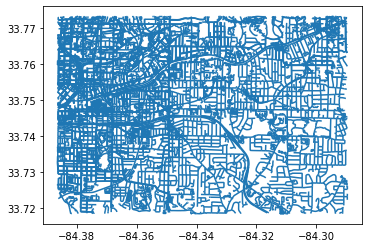

In [29]:
osm_links.plot()

In [30]:
cols = ['A','B','osmid','name','highway','highway_1','oneway','bicycle','footway','geometry']
osm_links = osm_links[cols]

In [31]:
osm_nodes.to_file(f'base_shapefiles/osm/osm_network_{studyareaname}.gpkg',layer='nodes',driver='GPKG')

In [32]:
osm_links.to_file(f'base_shapefiles/osm/osm_network_{studyareaname}.gpkg',layer='links',driver='GPKG')

Sometimes, there are duplicate attribute names in OSM. The below code drops duplicate column names by first appearance

In [17]:
#get rid of duplicate columns names
#overpass_links = overpass_links.iloc[:,overpass_links.columns.str.lower().duplicated(keep='first') == False]
